Text(0, 0.5, '$L$')

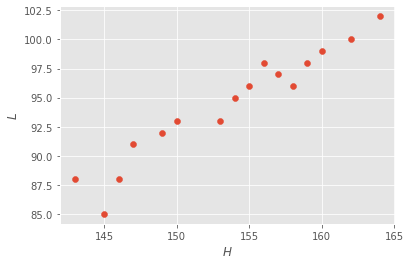

In [1]:
import numpy as np    # 导入 numpy库，用于科学计算
import pandas as pd    # 导入 pandas库 ，用于数据分析
import matplotlib.pyplot as plt   # 导入 pandas库 ，用于数据可视化

%matplotlib inline 
plt.style.use("ggplot")  # 使用ggplot绘图风格
from sklearn.linear_model import LinearRegression  # 导入线性回归工具函数 LinearRegression
x = np.array([143, 145, 146, 147, 149, 150, 153, 154, 155,
              156, 157, 158, 159, 160, 162, 164])  # 输入x数据
x = x.reshape(16, 1)    # 修改数据的格式，从行向量转换为列向量
y = np.array([88, 85, 88, 91, 92, 93, 93, 95, 96,
              98, 97, 96, 98, 99, 100, 102])  # 输入y数据
plt.scatter(x, y)    # 绘制散点图
plt.xlabel(r'$H$')  # 添加xlabel
plt.ylabel(r'$L$')  # 绘制ylabel

In [2]:
# 1. 初始化线性回归函数，命名为lrModel
lrModel = LinearRegression()
# 2. 使用lrModel对数据x,y进行拟合
lrModel.fit(x,y)

LinearRegression()

In [3]:
# 3. 输出截距和斜率
print(lrModel.intercept_)
print(lrModel.coef_)

-16.07298072980727
[0.71935219]


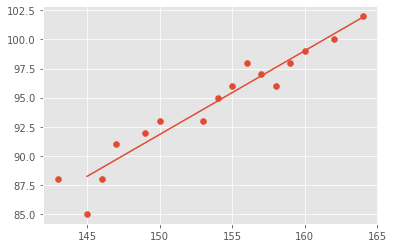

In [4]:
# 4. 根据回归得到的系数，在散点图上绘制回归直线
LR_data = [lrModel.intercept_ + lrModel.coef_ * i for i in range(145,165)]  # 求解回归直线上的一系列点
plt.plot(range(145, 165), LR_data)  # 绘制回归直线
plt.scatter(x, y)   # 绘制散点图

In [5]:
# 5. 计算R2
lrModel.score(x,y)

0.928187845952738

In [6]:
# 6. 对新的数据进行预测
lrModel.predict([[170],[163]])

array([106.21689217, 101.18142681])

In [7]:
import pandas as pd # 导入 pandas库 ，用于数据分析
data = pd.read_csv('../_static/lecture_specific/prediction_model/so2.csv') # 读入数据
print(data) # 显示数据

    SO2(ppm)    R    G    B    S    H
0          0  153  148  157  138   14
1          0  153  147  157  138   16
2          0  153  146  158  137   20
3          0  153  146  158  137   20
4          0  154  145  157  141   19
5         20  144  115  170  135   82
6         20  144  115  169  136   81
7         20  145  115  172  135   83
8         30  145  114  174  135   87
9         30  145  114  176  135   89
10        30  145  114  175  135   89
11        30  146  114  175  135   88
12        50  142   99  175  137  110
13        50  141   99  174  137  109
14        50  142   99  176  136  110
15        80  141   96  181  135  119
16        80  141   96  182  135  119
17        80  140   96  182  135  120
18       100  139   96  175  136  115
19       100  139   96  174  136  114
20       100  139   96  176  136  116
21       150  139   86  178  136  131
22       150  139   87  177  137  129
23       150  138   86  177  137  130
24       150  139   86  178  137  131


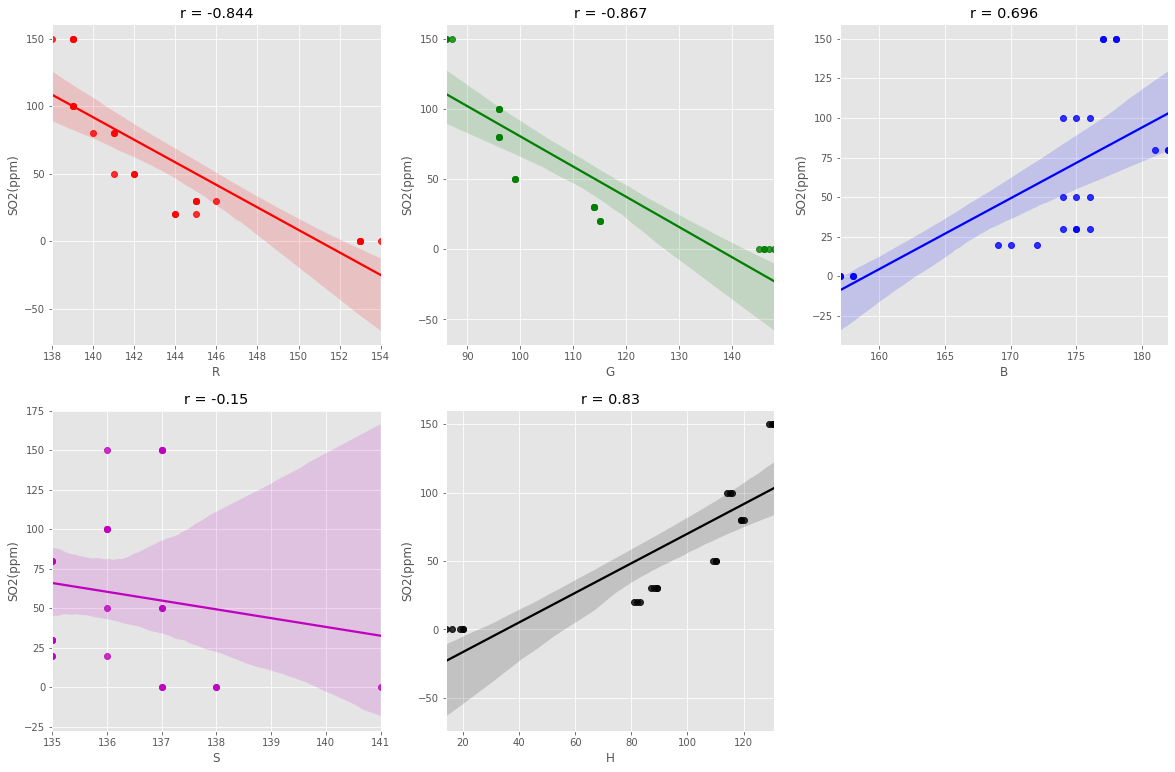

In [8]:
import seaborn as sns  # 导入 seaborn库 ，用于数据可视化
colors = ['r', 'g', 'b', 'm', 'black']  # 指定每个绘图的颜色
xlist = ['R', 'G', 'B', 'S', 'H']  # 指定每个绘图的变量名
plt.figure(figsize=(20, 13))  # 指定图片大小
for i in range(5):
    plt.subplot(2, 3, i+1)  # 绘制子图
    title = 'r = ' + str(round(np.corrcoef(data[xlist[i]],data['SO2(ppm)'])[1][0], 3))  # 定义子图标题
    sns.regplot(x=xlist[i], y="SO2(ppm)", data=data, color=colors[i])  # 绘制带有回归线和置信区间的线性回归图
    plt.title(title)  # 添加子图标题

In [9]:
from sklearn.linear_model import LinearRegression  # 导入线性回归函数LinearRegression
lrModel = LinearRegression()     # 初始化回归模型
lrModel.fit(np.array(data[['R', 'G', 'B', 'H']]),
            data['SO2(ppm)'])  # 输入需要回归的数据
print('截距为：', lrModel.intercept_)  # 输出截距
print('系数为：', lrModel.coef_)    # 输出系数
score = lrModel.score(np.array(data[['R', 'G', 'B', 'H']]), data['SO2(ppm)'])
print('R2为：', score)    # 输出相关系数R2

截距为： 2044.021593204974
系数为： [ -1.38977229 -17.5022507    5.68341432  -9.34216398]
R2为： 0.8961318172850157


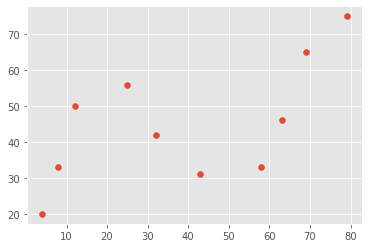

In [10]:
# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79] # 输入x
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]  # 输入y 
plt.scatter(x, y)  # 绘制散点图

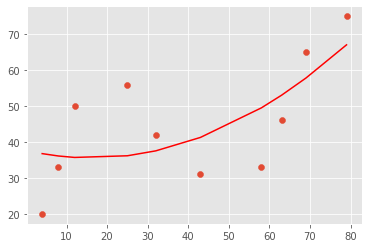

In [11]:
# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]
from scipy.optimize import curve_fit  # 导入非线性拟合函数curve_fit

# 定义需要拟合的函数形式，这里使用二次函数的一般式 y = ax^2 + bx + c
def f2(x, a, b, c):
    return a * x**2 + b*x + c


plt.scatter(x, y)  # 绘制散点图
popt, pcov = curve_fit(f2, x, y)    # 执行非线性拟合
# popt数组中，三个值分别是待求参数a,b,c
y1 = [f2(i, popt[0], popt[1], popt[2]) for i in x]   # 计算得到拟合曲线上的一系列点
plt.plot(x, y1, 'r')   # 绘制拟合曲线

Text(0.5, 1.0, '38.052046270695655')

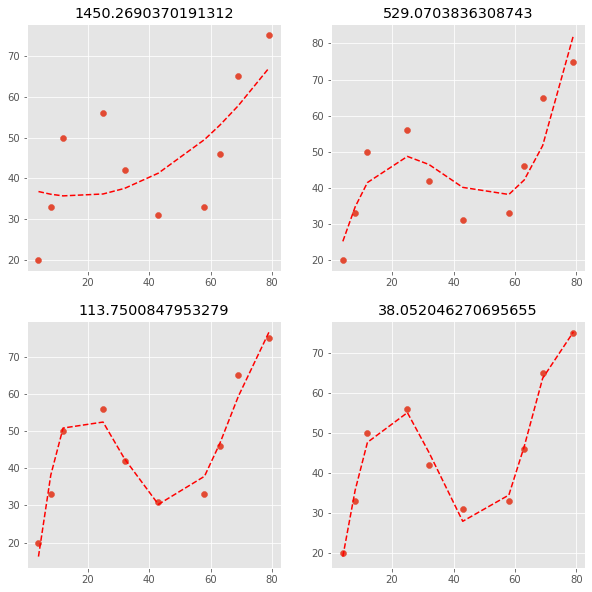

In [12]:
# f3为三次多项式
def f3(x, a, b, c,d):  
    return a * x**3 + b*x**2 +c *x +d
# f4为四次多项式
def f4(x, a, b, c,d,e):  
    return a * x**4 + b*x**3 +c *x**2 +d*x + e
# f5为五次多项式
def f5(x, a, b, c,d,e,f):  
    return a * x**5 + b*x**4 +c *x**3 +d*x**2 + e*x +f

# 定义方差计算函数
def error(y1,y2):
    a = np.array(y1)
    b = np.array(y2)
    return np.dot(a-b,a-b)
    

plt.figure(figsize = (10,10)) # 定义图片大小
plt.subplot(2,2,1) # 开始绘制第1张子图
plt.scatter(x, y)  # 绘制（x,y）的散点图
popt, pcov = curve_fit(f2, x, y)    # 执行2次多项式拟合
#popt数组中，三个值分别是待求参数a,b,c  
y1 = [f2(i, popt[0],popt[1],popt[2]) for i in x]  # 得到拟合曲线上的一系列点
plt.plot(x,y1,'r--')   # 绘制拟合曲线
plt.title(str(error(y,y1))) # 计算方差，并作为图片的标题

plt.subplot(2,2,2) # 开始绘制第2张子图
plt.scatter(x, y) # 绘制（x,y）的散点图
popt, pcov = curve_fit(f3, x, y)   # 执行3次多项式拟合
#popt数组中，三个值分别是待求参数a,b,c,d  
y1 = [f3(i, popt[0],popt[1],popt[2],popt[3]) for i in x]    # 得到拟合曲线上的一系列点
plt.plot(x,y1,'r--')   # 绘制拟合曲线
plt.title(str(error(y,y1))) # 计算方差，并作为图片的标题


plt.subplot(2,2,3) # 开始绘制第3张子图
plt.scatter(x, y)
popt, pcov = curve_fit(f4, x, y)  
y1 = [f4(i, popt[0],popt[1],popt[2],popt[3],popt[4]) for i in x]  
plt.plot(x,y1,'r--')  
plt.title(str(error(y,y1)))

plt.subplot(2,2,4) # 开始绘制第4张子图
plt.scatter(x, y)
popt, pcov = curve_fit(f5, x, y)  
y1 = [f5(i, popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]) for i in x]  
plt.plot(x,y1,'r--')  
plt.title(str(error(y,y1)))

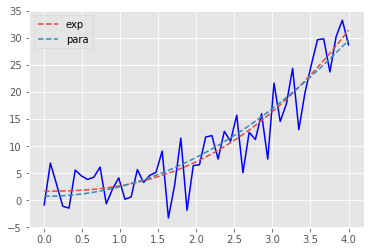

In [13]:
# 定义f1
def f1(x, a, b):  
    return x**a + b  
# 定义f2
def f2(x,a,b):
    return a*x**2 + b
# 随机生成数据并绘制折线图
xdata = np.linspace(0, 4, 50)  
y = f1(xdata, 2.5, 1.3)  
ydata = y + 4 * np.random.normal(size=len(xdata))  
plt.plot(xdata,ydata,'b-') 

# 开始拟合
popt1, pcov1 = curve_fit(f1, xdata, ydata)   # 使用f1进行拟合
popt2, pcov2 = curve_fit(f2, xdata, ydata)    # 使用f2进行拟合

y1 = [f1(i, popt1[0],popt1[1]) for i in xdata]
y2 = [f2(i, popt2[0],popt2[1]) for i in xdata]
plt.plot(xdata,y1,'--',label = 'exp')  
plt.plot(xdata,y2,'--',label = 'para') 
plt.legend()

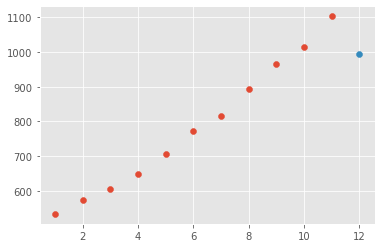

In [14]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # 输入x值
y = [
    533.8,
    574.6,
    606.9,
    649.8,
    705.1,
    772.0,
    816.4,
    892.7,
    963.9,
    1015.1,
    1102.7]  # 输入y值
plt.scatter(x, y)  # 绘制散点图
N = 4  # 选择N=4
y12 = np.mean(y[-4:])  # 进行移动平均预测
plt.scatter(12, y12)  # 绘制移动平均结果

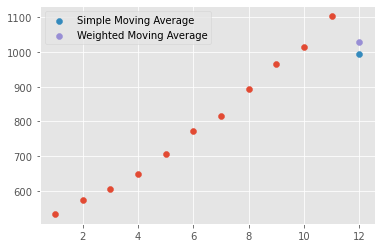

In [15]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # 输入x值
y = [
    533.8,
    574.6,
    606.9,
    649.8,
    705.1,
    772.0,
    816.4,
    892.7,
    963.9,
    1015.1,
    1102.7]  # 输入y值
plt.scatter(x, y)  # 绘制散点图
N = 4  # 选择移动平均项数
w = [0.1, 0.2, 0.3, 0.4]  # 指定权重
y12 = np.mean(y[-4:])  # 简单移动平均预测12月份收入
y12_weighted = np.dot(y[-4:], w)  # 加权移动平均预测12月份收入
plt.scatter(12, y12, label='Simple Moving Average')  # 绘制简单移动平均结果
plt.scatter(12, y12_weighted, label='Weighted Moving Average')  # 绘制加权移动平均结果
plt.legend()  # 加入图例

In [16]:
# 趋势移动平均代码
def moveingAverage(data,N):
    temp = data.copy()
    for i in range(len(temp)):
        if i >=  N :
            temp[i] = np.mean(data[i-N:i])
        else:
            temp[i] = 0
    return temp

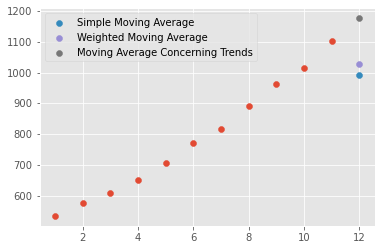

In [17]:
x = [1,2,3,4,5,6,7,8,9,10,11]
y =  [533.8,574.6,606.9,649.8,705.1,772.0 ,816.4, 892.7,963.9,1015.1,1102.7]
plt.scatter(x,y)
N = 4
w = [0.1,0.2,0.3,0.4]
y12 = np.mean(y[-4:])
y12_weighted = np.dot(y[-4:],w)

# 趋势移动平均代码
N = 4
MA1 = moveingAverage(y,N)
MA2 = moveingAverage(MA1,N)
at = 2 * MA1[-1] - MA2[-1]
bt = 2/(N-1) * (MA1[-1] - MA2[-1])

y_hat = at + bt * 1

plt.scatter(12,y12,label = 'Simple Moving Average')
plt.scatter(12,y12_weighted,label = 'Weighted Moving Average')
plt.scatter(12,y_hat,label = 'Moving Average Concerning Trends')
plt.legend()

In [18]:
yt=[0.1 * i for i in range(1,11)]
m=len(yt)
k=0.9
N=2
Terr=10000
w=np.ones(N)/N
while abs(Terr)>0.00001:
    Terr=[]
    for j in range(N+1,m):
        yhat = np.dot(w,yt[j-N:j])
        err = yt[j] - yhat
        Terr.append(err)
        w = w + 2*k*err*np.array(yt[j-N:j])
    Terr = max(Terr)